# NAME - ABHIJEET JAIN

## Data Science and Business Analytics Intern @ The Sparks Foundation

# TSF GRIP TASK - Beginner Level

## #Task1 : Prediction Using Supervised ML

### Problem Statement - In this task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### To Predict - Predict the percentage of an student based on the number of study hours.

### Dataset : http://bit.ly/w-data

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Data in DataFrame

In [2]:
data = pd.read_csv("http://bit.ly/w-data")
data.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.shape

(25, 2)

In [10]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Scatterplot of our Data

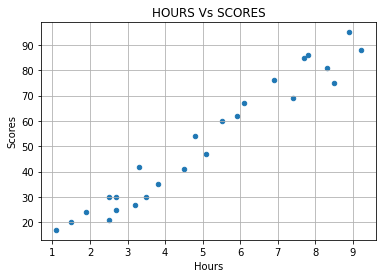

In [12]:
data.plot.scatter(x="Hours" , y="Scores")
plt.title("HOURS Vs SCORES")
plt.grid()
plt.show()

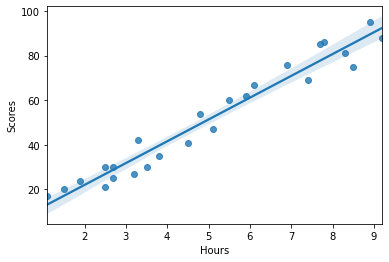

In [13]:
import seaborn as sns
sns.regplot(x=data['Hours'],y=data['Scores']);

## Boxplot of Data

<AxesSubplot:>

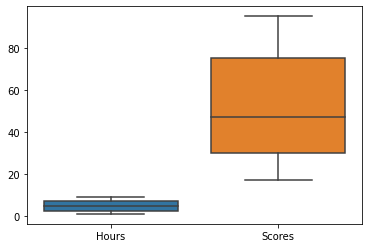

In [14]:
sns.boxplot(data=data[["Hours","Scores"]])

##### Clearly we can see that there is positive linear relationship between hours and score

## Preparing the Data

In [15]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [16]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [17]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

## Split Data into Training and Test Sets

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size = 0.20, random_state = 0)

##### Here we are using 20% of the Data for Testing and 80% of our Dataset for Training.

## Training the Algorithm 
### Simple Linear Regression
#### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

In [22]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training Complete.")

Training Complete.


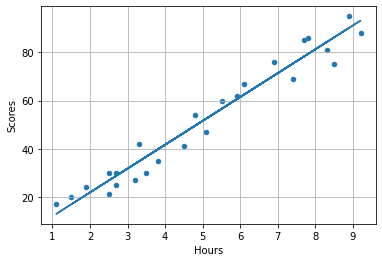

In [23]:
line = regressor.coef_*X+regressor.intercept_

data.plot.scatter(x="Hours",y="Scores")
plt.plot(X, line);
plt.grid()
plt.show()

##### From the above graph, we can clearly see that there is a positive linear relation between hours and scores.

In [24]:
y_pred = regressor.predict(X_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


## Equating Actual Vs Predicted

In [34]:
pred_y = regressor.predict(X_test)

In [37]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


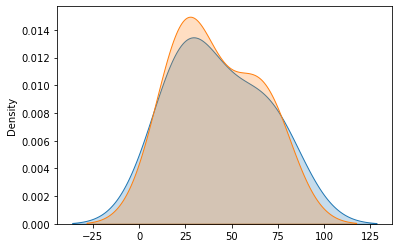

In [44]:
sns.kdeplot(pred_y,label="Predicted", shade=True);
sns.kdeplot(data=y_test, label="Actual", shade=True);

## Here we are needed to predict the score if a student studies for 9.25 hrs/ day

In [45]:
my_hours = np.array([[9.25]])
my_pred = regressor.predict(my_hours)
print("No of Hours = {}".format(my_hours[0][0]))
print("Predicted Score = {}".format(my_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


## Evaluating the Model
##### The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [47]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
